# map visualization with geopandas


### importing libraries and reading file

In [ ]:
import pandas as pd
import geopandas as gpd

df = pd.read_csv('covid_19_clean_complete.csv')

In [73]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


## getting just the most recent date and reading ShapeFile

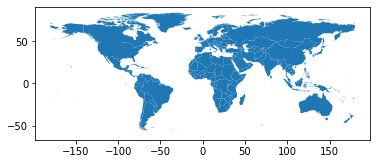

In [74]:
df = df.loc[df['Date'] == '2020-05-12']
geo_data = gpd.read_file(r'C:\Users\Julio\Documents\projetos\map visualization/World_Map.shp')
geo_data.plot()
df = df[['Country', 'Confirmed']]


In [75]:
df.head()

,Country,Confirmed
20757,Afghanistan,4963
20758,Albania,876
20759,Algeria,6067
20760,Andorra,758
20761,Angola,45


## Manually adapting columns

In [89]:


        
df = df[df.Country != 'Diamond Princess']
df = df[df.Country != 'Holy See']
df = df[df.Country != 'MS Zaandam']
df = df[df.Country != 'Kosovo']
df = df[df.Country != 'South Sudan']
df = df[df.Country != 'West Bank and Gaza']
df = df[df.Country != 'Congo (Kinshasa)']



geo_data.replace('Korea, Republic of', 'Korea, South', inplace=True)
geo_data.replace('Brunei Darussalam', 'Brunei', inplace=True)
geo_data.replace('Cape Verde', 'Cabo Verde', inplace=True)
geo_data.replace('Democratic Republic of the Congo', 'Congo (Brazzaville)', inplace=True)
geo_data.replace('Czech Republic', 'Czechia', inplace=True)
geo_data.replace('Swaziland', 'Eswatini', inplace=True)
geo_data.replace('Iran (Islamic Republic of)', 'Iran', inplace=True)
geo_data.replace('The former Yugoslav Republic of Macedonia', 'North Macedonia', inplace=True)
geo_data.replace("Lao People's Democratic Republic", 'Laos', inplace=True)
geo_data.replace('Libyan Arab Jamahiriya', 'Libya', inplace=True)
geo_data.replace('Republic of Moldova', 'Moldova', inplace=True)
geo_data.replace('Syrian Arab Republic', 'Syria', inplace=True)
geo_data.replace('Taiwan', 'Taiwan*', inplace=True)
geo_data.replace('United Republic of Tanzania', 'Tanzania', inplace=True)
geo_data.replace('United States', 'US', inplace=True)
geo_data.replace('Viet Nam', 'Vietnam', inplace=True)
geo_data.replace('Viet Nam', 'Vietnam', inplace=True)

countries_list = df['Country'].tolist()
geo_countries_list = geo_data['NAME'].tolist()

#for item in countries_list:
 #   if item in geo_countries_list:
 #       pass
 #   else:
 #       print(item + ' is not in geo dataset')

In [90]:
df.rename(columns={'Country': 'NAME'}, inplace=True)

combined = geo_data.merge(df, on='NAME')

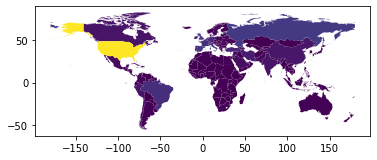

In [100]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

combined.plot(column='Confirmed', ax=ax)


combined.to_file(r'C:\Users\Julio\Documents\projetos\map visualization\combined.shp')